In [142]:
import pandas as pd
from datetime import datetime

import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', 200)

data = pd.read_csv('data.csv')
data['timestamp'] = data['timestamp'] // 1000
data.timestamp = data.timestamp.apply(lambda stamp: datetime.fromtimestamp(stamp))
data.timestamp = data.timestamp - pd.Timedelta(hours=1) # for flexibility
data['day'] = (data.timestamp.dt.date - data.timestamp.dt.date.min()).apply(lambda x: x.days)
data.head(10)

,timestamp,xprice,yprice,returns,day
0,2013-01-03 20:05:00,139.8375,169.2500,0.3125,0
1,2013-01-03 20:05:10,139.8875,169.3000,0.2750,0
2,2013-01-03 20:05:20,139.8625,169.3375,0.2500,0
3,2013-01-03 20:05:30,139.8375,169.3625,0.2375,0
4,2013-01-03 20:05:40,139.8375,169.3625,0.3250,0
5,2013-01-03 20:05:50,139.8125,169.3625,0.3375,0
6,2013-01-03 20:06:00,139.7875,169.3250,0.3500,0
7,2013-01-03 20:06:10,139.7750,169.3250,0.3500,0
8,2013-01-03 20:06:20,139.7875,169.2750,0.4000,0
9,2013-01-03 20:06:30,139.7875,169.3125,0.3625,0


# крч суть задачи предсказать на 60 строчек вниз)))

## Data


The attached zip file contains a CSV file, containing price data for two financial instruments, called X and Y. These are real market prices, sampled once every 10 seconds. 

The four columns are

- "timestamp" - the timestamp of this observation (millis since 00:00:00 January 1, 1970)

- "xprice" - the price of instrument X

- "yprice" - the price of instrument Y

- "returns" - the returns of instrument Y

The 'returns' column is defined to be the price ten minutes from now, minus the current price. It has been truncated to remove outliers. In the event that there is no price ten minutes from now (because the market has closed, for example) then the latest price available is used.


## Task 

The task is to build a model to predict the returns of asset Y using lagged price information of X and Y. The model will be judged on out-of-sample mean-squared prediction error, defined as


$$MSPE = mean((returns - prediction) ^ 2)$$

To make the forecast at time t, you may use data up to and including time t.

The solution should be in the form of two functions

$$parameters = modelEstimate(trainingFilename)$$

$$predictions = modelForecast(testFilename, parameters)$$

The "modelEstimate" function takes the filename of a CSV file containing the training data, and returns an object containing the parameters of the fitted model.

The "modelForecast" function takes the filename of a CSV file containing the test data and a set of parameters, and outputs a vector of predictions (one prediction for each observation in the data set).

# Visualisation step

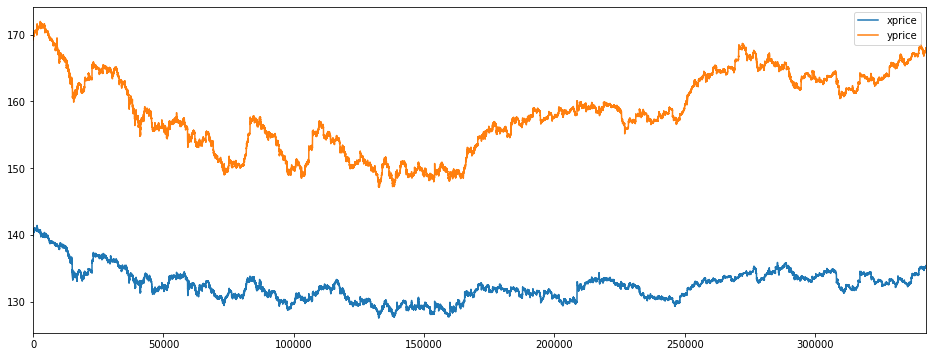

In [2]:
data.xprice.plot(figsize=(16,6))
data.yprice.plot(figsize=(16,6))
plt.legend(loc='best')
plt.show()

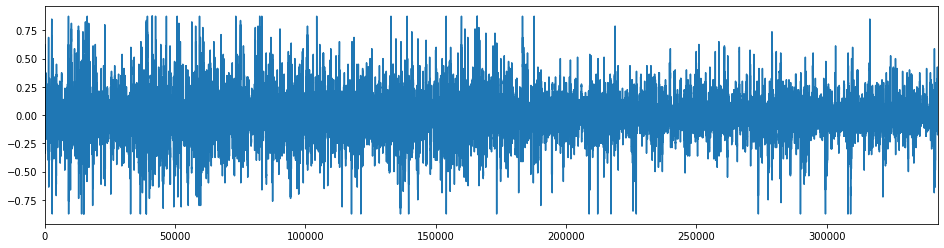

In [3]:
data.returns.plot(figsize=(16,4))
plt.show()

In [119]:
data[30::60].head(100)

,timestamp,xprice,yprice,returns
30,2013-01-03 20:10:00,139.8875,169.3875,0.5125
90,2013-01-03 20:20:00,140.4375,169.9000,0.2875
150,2013-01-03 20:30:00,140.5375,170.1875,-0.2125
210,2013-01-03 20:40:00,140.4625,169.9750,-0.0250
270,2013-01-03 20:50:00,140.5000,169.9500,-0.0750
330,2013-01-03 21:00:00,140.4625,169.8750,0.1500
390,2013-01-03 21:10:00,140.5625,170.0250,0.2625
450,2013-01-03 21:20:00,140.8125,170.2875,0.0375
510,2013-01-03 21:30:00,140.7875,170.3250,0.0125
570,2013-01-03 21:40:00,140.9125,170.3375,-0.0250


In [127]:
data[1400:1420].head(100)

,timestamp,xprice,yprice,returns
1400,2013-01-03 23:58:20,140.6625,169.9625,0.3375
1401,2013-01-03 23:58:30,140.6625,169.9625,0.3375
1402,2013-01-03 23:58:40,140.6875,169.9750,0.3250
1403,2013-01-03 23:58:50,140.7625,170.0375,0.2625
1404,2013-01-03 23:59:00,140.8125,170.1125,0.1875
1405,2013-01-03 23:59:10,140.8250,170.2125,0.0875
1406,2013-01-03 23:59:20,140.8125,170.2375,0.0625
1407,2013-01-03 23:59:30,140.8375,170.2500,0.0500
1408,2013-01-03 23:59:40,140.8875,170.3125,-0.0125
1409,2013-01-03 23:59:50,140.8625,170.3000,0.0000


In [118]:
data.timestamp.dt.weekday.value_counts()

4    69090
3    69090
1    69090
2    67680
0    67680
Name: timestamp, dtype: int64

In [75]:
data.timestamp.apply(lambda x: (x.hour, x.minute // 10 * 10)).value_counts().sort_index()

(0, 0)       4800
(0, 10)      4800
(0, 20)      4800
(0, 30)      4800
(0, 40)      4800
(0, 50)      4800
(20, 0)      4890
(20, 10)     9780
(20, 20)     9780
(20, 30)     9780
(20, 40)     9780
(20, 50)     9780
(21, 0)     12180
(21, 10)    14580
(21, 20)    14580
(21, 30)    14580
(21, 40)    14580
(21, 50)    14580
(22, 0)     14580
(22, 10)    14580
(22, 20)    14580
(22, 30)    14580
(22, 40)    14580
(22, 50)    14580
(23, 0)     14580
(23, 10)    14580
(23, 20)    14580
(23, 30)    14580
(23, 40)    14580
(23, 50)    14580
Name: timestamp, dtype: int64

# Validation preparation

In [78]:
def time_split(data, holdaut_ratio):
    n_holdaut_observations = int(data.shape[0] * holdaut_ratio)
    train = data.iloc[:-n_holdaut_observations]
    test = data.iloc[-n_holdaut_observations:]
    return train, test

holdaut_ratio = 0.2
train, test = time_split(data, holdaut_ratio)
print(train.shape, test.shape)
train.head()

(274104, 4) (68526, 4)


,timestamp,xprice,yprice,returns
0,2013-01-03 21:05:00,139.8375,169.2500,0.3125
1,2013-01-03 21:05:10,139.8875,169.3000,0.2750
2,2013-01-03 21:05:20,139.8625,169.3375,0.2500
3,2013-01-03 21:05:30,139.8375,169.3625,0.2375
4,2013-01-03 21:05:40,139.8375,169.3625,0.3250


1    69090
4    68730
3    68730
2    68040
0    61920
5     6120
Name: timestamp, dtype: int64

# SuperNaive baseline

In [159]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

usecols = ['xprice', 'yprice']

model = Ridge()
model.fit(train[usecols], train.returns)
y_predicted = model.predict(test[usecols])

print(y_predicted)
print('MSE: {:.4}'.format(mean_squared_error(y_predicted, test.returns)))

[-0.00412049 -0.00411426 -0.00421182 ... -0.00704967 -0.00693653
 -0.00675699]
MSE: 0.0186


In [160]:
def add_diffs(df, column, uselags):
    for lag in uselags:
        colname = '{}_lag_{}'.format(column, lag)
        df.loc[:, colname] = df[column].diff(lag)

def add_shifts(df, column, uselags):
    for lag in uselags:
        colname = '{}_lag_{}'.format(column, lag)
        df.loc[:, colname] = df[column].shift(lag)
        
add_diffs(data, 'yprice', [1,2])


train, test = time_split(data.dropna(), holdaut_ratio)
data.head()

,timestamp,xprice,yprice,returns,day,yprice_lag_1,yprice_lag_2
0,2013-01-03 20:05:00,139.8375,169.2500,0.3125,0,NaN,NaN
1,2013-01-03 20:05:10,139.8875,169.3000,0.2750,0,0.0500,NaN
2,2013-01-03 20:05:20,139.8625,169.3375,0.2500,0,0.0375,0.0875
3,2013-01-03 20:05:30,139.8375,169.3625,0.2375,0,0.0250,0.0625
4,2013-01-03 20:05:40,139.8375,169.3625,0.3250,0,0.0000,0.0250


In [165]:
usecols = ['xprice', 'yprice', 'yprice_lag_1', 'yprice_lag_2']

model = Ridge(alpha=1000000)
model.fit(train[usecols], train.returns)
y_predicted = model.predict(test[usecols])

print('MSE: {:.4}'.format(mean_squared_error(y_predicted, test.returns)))

MSE: 0.01862


In [162]:
y_predicted

array([-0.0040497 , -0.00326365, -0.00250508, ..., -0.00673865,
       -0.00710029, -0.0105684 ])

# Fbprophet baseline

In [9]:
prophet_df = pd.DataFrame()
prophet_df['ds'] = train.timestamp
prophet_df['y'] = train.yprice

prophet_future = pd.DataFrame()
prophet_future['ds'] = test.timestamp

In [22]:
from fbprophet import Prophet
fb_model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
%time fb_model.fit(prophet_df)

In [23]:
forecast = fb_model.predict(prophet_future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
68521,2013-12-31 00:59:10,178.267994,74.755420,273.612483
68522,2013-12-31 00:59:20,178.268013,75.800459,273.481737
68523,2013-12-31 00:59:30,178.268033,75.192556,273.458400
68524,2013-12-31 00:59:40,178.268052,74.425250,273.588487
68525,2013-12-31 00:59:50,178.268071,74.387999,272.759802
